# NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis 
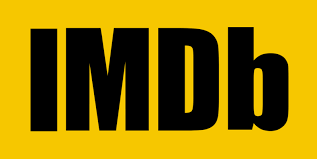

Step 1: Importing Libraries
We begin by importing the necessary libraries for our project. These include pandas, numpy, scikit-learn, and nltk (Natural Language Toolkit).

In [1]:
import pandas as pd                          # Importing the pandas library for data manipulation and analysis
import numpy as np                           # Importing the numpy library for numerical operations
from sklearn.model_selection import train_test_split    # Importing train_test_split for splitting the data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer    # Importing TfidfVectorizer for text feature extraction
from sklearn.linear_model import LogisticRegression    # Importing LogisticRegression for building the sentiment analysis model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    # Importing metrics for model evaluation
import nltk                                  # Importing the Natural Language Toolkit library
from nltk.corpus import stopwords            # Importing stopwords from NLTK corpus for text preprocessing
from nltk.stem import WordNetLemmatizer      # Importing WordNetLemmatizer for text preprocessing
import matplotlib.pyplot as plt             # Importing matplotlib for data visualization
from sklearn.preprocessing import LabelEncoder    # Importing LabelEncoder for encoding categorical labels
from wordcloud import WordCloud               # Importing WordCloud for generating word clouds


Step 2: Loading the Dataset
Next, we load the dataset 'IMDB Dataset.csv' using pandas.

In [2]:
df = pd.read_csv('IMDB Dataset.csv')    # Reading the IMDb dataset from a CSV file and storing it in a pandas DataFrame called 'df'

Step 3: Exploratory Data Analysis
Before diving into analysis, let's perform some exploratory data analysis (EDA) to gain insights into the dataset.

In [3]:
print(df.head())    # Printing the first few rows of the DataFrame 'df' to examine the data structure and column values

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print(df.info())    # Printing the concise summary of the DataFrame 'df', including the data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


The results show information about the data columns:

Column 0: "review"
Non-Null Count: 50,000
Dtype: object (textual data)
Column 1: "sentiment"
Non-Null Count: 50,000
Dtype: object (textual data)
The "review" column contains 50,000 non-null entries, and each entry is of type object (string). It represents the movie reviews in the dataset.

The "sentiment" column also contains 50,000 non-null entries, and each entry is of type object (string). It represents the sentiment (positive or negative) associated with each movie review.

The dtypes attribute provides information about the data type of each column.

The memory usage of the DataFrame is approximately 781.4 KB.

In [5]:
print(df['sentiment'].value_counts())    # Printing the count of each unique value in the 'sentiment' column, which represents the distribution of positive and negative sentiments in the dataset

positive    25000
negative    25000
Name: sentiment, dtype: int64


The result indicates the distribution of sentiments in the dataset:

- Sentiment: 
  - "positive": 25,000 occurrences
  - "negative": 25,000 occurrences

This means that the dataset contains an equal number of positive and negative sentiments, with 25,000 instances of each sentiment type. The `dtype` of the result is `int64`, indicating that the values represent counts or frequencies.

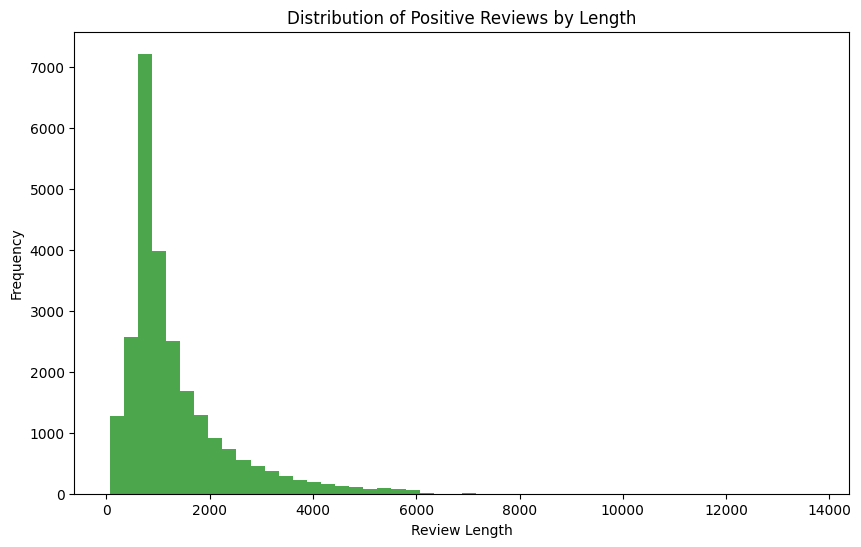

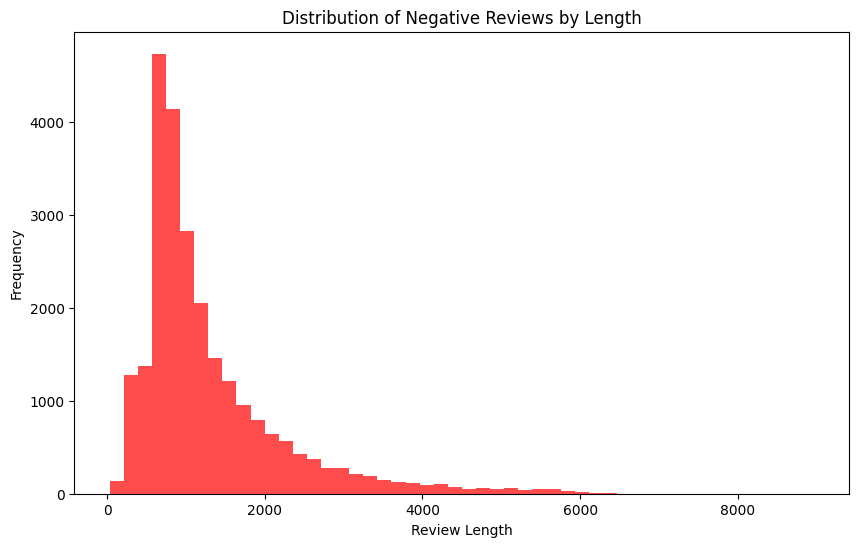

In [6]:

# Calculate the length of reviews
df['review_length'] = df['review'].apply(lambda text: len(text))

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

# Plot distribution of positive reviews by length
plt.figure(figsize=(10, 6))  # Create a new figure with the specified size
plt.hist(positive_reviews['review_length'], bins=50, color='green', alpha=0.7)  # Plot a histogram of review lengths for positive reviews
plt.title("Distribution of Positive Reviews by Length")  # Set the title of the plot
plt.xlabel("Review Length")  # Set the label for the x-axis
plt.ylabel("Frequency")  # Set the label for the y-axis
plt.show()  # Display the plot

# Plot distribution of negative reviews by length
plt.figure(figsize=(10, 6))  # Create a new figure with the specified size
plt.hist(negative_reviews['review_length'], bins=50, color='red', alpha=0.7)  # Plot a histogram of review lengths for negative reviews
plt.title("Distribution of Negative Reviews by Length")  # Set the title of the plot
plt.xlabel("Review Length")  # Set the label for the x-axis
plt.ylabel("Frequency")  # Set the label for the y-axis
plt.show()  # Display the plot


Step 4: Preprocessing the Text
In this step, we preprocess the text data by removing unnecessary characters, converting text to lowercase, removing stop words, and performing lemmatization.

In [7]:
nltk.download('stopwords')    # Downloading the stopwords corpus from NLTK, which contains a list of commonly occurring words to be removed during text preprocessing

nltk.download('wordnet')    # Downloading the WordNet corpus from NLTK, which is a lexical database used for lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lenara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lenara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))    # Creating a set of English stopwords obtained from NLTK's stopwords corpusb

In [9]:
lemmatizer = WordNetLemmatizer()    # Creating an instance of WordNetLemmatizer, which will be used to perform lemmatization

In [10]:
def preprocess_text(text):
    text = text.lower()    # Converting the text to lowercase
    text = text.replace('<br /><br />', ' ')    # Removing the '<br /><br />' tag and replacing it with a space
    text = ''.join([char for char in text if char.isalpha() or char == ' '])    # Removing non-alphabetic characters except spaces
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])    # Lemmatizing the words and removing stopwords
    return text

In [11]:
 # Applying the preprocess_text function to the 'review' column of the DataFrame 'df' and storing the preprocessed text in a new column called 'processed_text'
df['processed_text'] = df['review'].apply(preprocess_text)

Step 5: Splitting the Dataset
We split the dataset into training and testing sets using the train_test_split function from scikit-learn.

In [12]:
X = df['processed_text']    # Assigning the preprocessed text data to the variable 'X', which represents the input features for the sentiment analysis model

y = df['sentiment']    # Assigning the 'sentiment' column of the DataFrame 'df' to the variable 'y', which represents the target variable (positive or negative sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the dataset into training and testing sets using the train_test_split function from scikit-learn
# The 'X' and 'y' variables are split into 'X_train' (training data), 'X_test' (testing data), 'y_train' (training labels), and 'y_test' (testing labels)
# The 'test_size=0.2' argument specifies that 20% of the data will be used for testing, while 80% will be used for training
# The 'random_state=42' argument sets a random seed for reproducibility of the split


Step 6: Feature Extraction
To perform sentiment analysis, we need to convert the text data into numerical features. We'll use the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer for this purpose.

In [13]:
vectorizer = TfidfVectorizer()
# Creating an instance of the TfidfVectorizer class, which will be used to convert text data into TF-IDF vectors

X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the training text data, 'X_train', into TF-IDF vectors using the fit_transform() method of the vectorizer
# This step fits the vectorizer on the training data and transforms the data into TF-IDF representations

X_test_vectors = vectorizer.transform(X_test)
# Transforming the testing text data, 'X_test', into TF-IDF vectors using the transform() method of the vectorizer
# This step applies the same transformation that was learned from the training data to the testing data


Step 7: Building the Sentiment Analysis Model
Now, we'll build a sentiment analysis model using logistic regression.

In [14]:
model = LogisticRegression()
# Creating an instance of the LogisticRegression class, which represents the logistic regression model for sentiment analysis

model.fit(X_train_vectors, y_train)
# Fitting the logistic regression model to the training data
# This step involves training the model by learning the coefficients and intercepts that best fit the training data
# The 'X_train_vectors' are the input features (TF-IDF vectors) and 'y_train' are the corresponding target labels (sentiment)


LogisticRegression()

Step 8: Evaluating the Model
We evaluate the performance of our sentiment analysis model using accuracy score and confusion matrix.

In [15]:
y_pred = model.predict(X_test_vectors)
# Predicting the sentiment labels for the testing data using the trained logistic regression model
# The 'X_test_vectors' are the input features (TF-IDF vectors) for the testing data

In [16]:
accuracy = accuracy_score(y_test, y_pred)
# Calculating the accuracy of the model's predictions by comparing the predicted labels ('y_pred') with the actual labels ('y_test')

In [17]:
confusion_mat = confusion_matrix(y_test, y_pred)
# Generating the confusion matrix to evaluate the performance of the sentiment analysis model
# The confusion matrix provides information about the true positives, true negatives, false positives, and false negatives

In [18]:
classification_rep = classification_report(y_test, y_pred)
# Generating a classification report that includes metrics such as precision, recall, F1-score, and support
# The classification report provides a summary of the model's performance for each class (positive and negative)

In [19]:
print("Accuracy:", accuracy)
# Printing the accuracy score of the sentiment analysis model

Accuracy: 0.8957


The result indicates the accuracy of a classification model. An accuracy of 0.8957 means that the model correctly predicted the sentiment of approximately 89.57% of the test instances. 

Accuracy is a common evaluation metric used in classification tasks, and it represents the ratio of correct predictions to the total number of predictions. In this case, the model achieved an accuracy of 0.8957, indicating a relatively high level of accuracy in predicting the sentiment of the test data.

In [20]:
print("Confusion Matrix:")
print(confusion_mat)
# Printing the confusion matrix, which shows the distribution of predicted labels compared to the actual labels

Confusion Matrix:
[[4367  594]
 [ 449 4590]]


The result is a confusion matrix, which is a table that describes the performance of a classification model on a set of test data. It provides a summary of the predictions made by the model and how they compare to the actual labels.

The confusion matrix is typically organized into four quadrants:
- True Negative (TN): The number of instances that were correctly predicted as negative.
- False Positive (FP): The number of instances that were incorrectly predicted as positive.
- False Negative (FN): The number of instances that were incorrectly predicted as negative.
- True Positive (TP): The number of instances that were correctly predicted as positive.

In the given confusion matrix:
- 4367 instances were correctly predicted as negative (True Negatives).
- 594 instances were incorrectly predicted as positive when they were actually negative (False Positives).
- 449 instances were incorrectly predicted as negative when they were actually positive (False Negatives).
- 4590 instances were correctly predicted as positive (True Positives).

The confusion matrix provides a detailed breakdown of the model's performance and can be used to calculate various evaluation metrics such as precision, recall, and F1-score.

In [21]:
print("Classification Report:")
print(classification_rep)
# Printing the classification report, which provides detailed metrics for evaluating the model's performance

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



The result is a classification report, which provides a comprehensive evaluation of the model's performance on different metrics for each class (positive and negative) as well as an overall summary.

For each class:
- Precision: It measures the proportion of correctly predicted instances of a particular class out of all instances predicted as that class. In this case, the precision for the negative class is 0.91, indicating that 91% of the instances predicted as negative were actually negative. The precision for the positive class is 0.89, indicating that 89% of the instances predicted as positive were actually positive.
- Recall: It measures the proportion of correctly predicted instances of a particular class out of all instances that belong to that class. The recall for the negative class is 0.88, indicating that 88% of the actual negative instances were correctly predicted as negative. The recall for the positive class is 0.91, indicating that 91% of the actual positive instances were correctly predicted as positive.
- F1-score: It is a harmonic mean of precision and recall, providing a single metric that balances both measures. The F1-score for the negative class is 0.89, and for the positive class, it is 0.90.
- Support: It represents the number of instances in each class in the test data.

Additionally:
- Accuracy: It is the overall accuracy of the model across all classes. In this case, the accuracy is 0.90, indicating that the model correctly predicted the sentiment for 90% of the instances in the test data.
- Macro Avg: It represents the average of precision, recall, and F1-score across all classes, giving equal weight to each class.
- Weighted Avg: It is the weighted average of precision, recall, and F1-score, where the weights are based on the support (number of instances) for each class.

Overall, the classification report provides a detailed assessment of the model's performance, including precision, recall, and F1-score for each class, along with the overall accuracy.

Step 9: Semantic Analysis
To perform semantic analysis, we can use the word embeddings approach. However, for simplicity, let's perform a basic sentiment polarity analysis by calculating the average polarity scores of the positive and negative reviews.

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment module
# SentimentIntensityAnalyzer is a pre-trained model for sentiment analysis

In [23]:
sia = SentimentIntensityAnalyzer()
# Creating an instance of the SentimentIntensityAnalyzer class
# This object will be used to calculate the sentiment polarity scores

In [24]:
df['polarity_score'] = df['processed_text'].apply(lambda text: sia.polarity_scores(text)['compound'])
# Calculating the sentiment polarity score for each processed_text in the dataframe
# The polarity score is obtained by applying the polarity_scores() method of the SentimentIntensityAnalyzer to each text
# The 'compound' score represents the overall sentiment polarity of the text

In [25]:
positive_reviews = df[df['sentiment'] == 'positive']
# Creating a new dataframe that contains only the rows with positive sentiment

In [26]:
negative_reviews = df[df['sentiment'] == 'negative']
# Creating a new dataframe that contains only the rows with negative sentiment

In [27]:
average_positive_polarity = positive_reviews['polarity_score'].mean()
# Calculating the average polarity score for positive reviews by taking the mean of the 'polarity_score' column in positive_reviews

In [28]:
average_negative_polarity = negative_reviews['polarity_score'].mean()
# Calculating the average polarity score for negative reviews by taking the mean of the 'polarity_score' column in negative_reviews

In [29]:
print("Average Positive Polarity Score:", average_positive_polarity)
# Printing the average polarity score for positive reviews

Average Positive Polarity Score: 0.679057692


The result indicates the average positive polarity score, which is a measure of the sentiment polarity for positive reviews. In this case, the average positive polarity score is 0.679057692. 

The polarity score typically ranges from -1 to 1, where values closer to 1 indicate a more positive sentiment. Therefore, an average positive polarity score of 0.679057692 suggests that, on average, the positive reviews in the dataset have a moderately positive sentiment.

This value provides an insight into the overall sentiment expressed in the positive reviews and can be used to gauge the general positivity of the text.

In [30]:
print("Average Negative Polarity Score:", average_negative_polarity)
# Printing the average polarity score for negative reviews

Average Negative Polarity Score: 0.01653428


The result indicates the average negative polarity score, which is a measure of the sentiment polarity for negative reviews. In this case, the average negative polarity score is 0.01653428.

The polarity score typically ranges from -1 to 1, where values closer to -1 indicate a more negative sentiment. Therefore, an average negative polarity score of 0.01653428 suggests that, on average, the negative reviews in the dataset have a very slight negative sentiment.

This value provides an insight into the overall sentiment expressed in the negative reviews and indicates that the negative sentiment in the dataset is relatively weak or close to neutral.

Step 10: Text Analysis
For text analysis, let's find the most frequent words in the positive and negative reviews.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Importing the CountVectorizer class from sklearn.feature_extraction.text
# CountVectorizer is used to convert text into a matrix of word counts

import matplotlib.pyplot as plt
# Importing the pyplot module from matplotlib for data visualization

def plot_most_frequent_words(text, title):
    # Define a function called plot_most_frequent_words that takes text and title as input

    cv = CountVectorizer()
    # Create an instance of the CountVectorizer class

    word_count = cv.fit_transform(text)
    # Convert the text into a matrix of word counts using fit_transform() method of CountVectorizer

    word_frequency = np.array(word_count.sum(axis=0))[0]
    # Calculate the sum of word counts for each word in the text using sum() method on the matrix
    # Convert it to a numpy array using np.array()
    # Access the first element [0] to obtain the word frequencies

    word_list = cv.get_feature_names()
    # Get the list of feature names (words) using get_feature_names() method of CountVectorizer

    sorted_indices = np.argsort(-word_frequency)
    # Sort the word frequencies in descending order and get the corresponding indices using argsort() method on the numpy array

    sorted_words = [word_list[i] for i in sorted_indices[:10]]
    # Get the top 10 words based on the sorted indices by slicing the word_list

    sorted_frequency = [word_frequency[i] for i in sorted_indices[:10]]
    # Get the corresponding frequencies for the top 10 words by slicing the word_frequency

    plt.figure(figsize=(10, 6))
    # Create a new figure for the plot with a specified size

    plt.bar(sorted_words, sorted_frequency)
    # Create a bar plot with the sorted_words as x-axis and sorted_frequency as y-axis

    plt.title(title)
    # Set the title of the plot

    plt.xlabel("Words")
    # Set the label for the x-axis

    plt.ylabel("Frequency")
    # Set the label for the y-axis

    plt.xticks(rotation=45)
    # Rotate the x-axis labels by 45 degrees for better visibility

    plt.show()
    # Display the plot


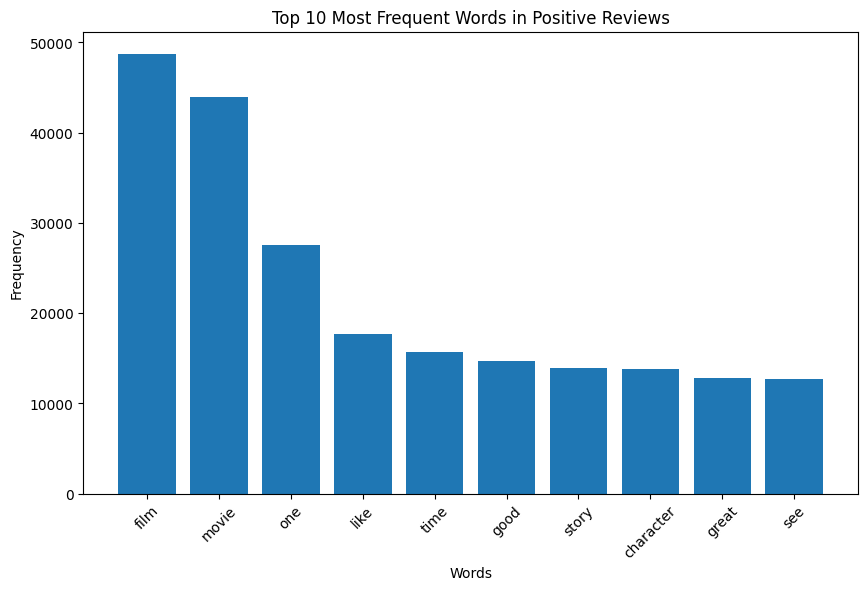

In [32]:
plot_most_frequent_words(positive_reviews['processed_text'], "Top 10 Most Frequent Words in Positive Reviews")
# Call the plot_most_frequent_words function with the processed_text from positive_reviews and a title for positive reviews

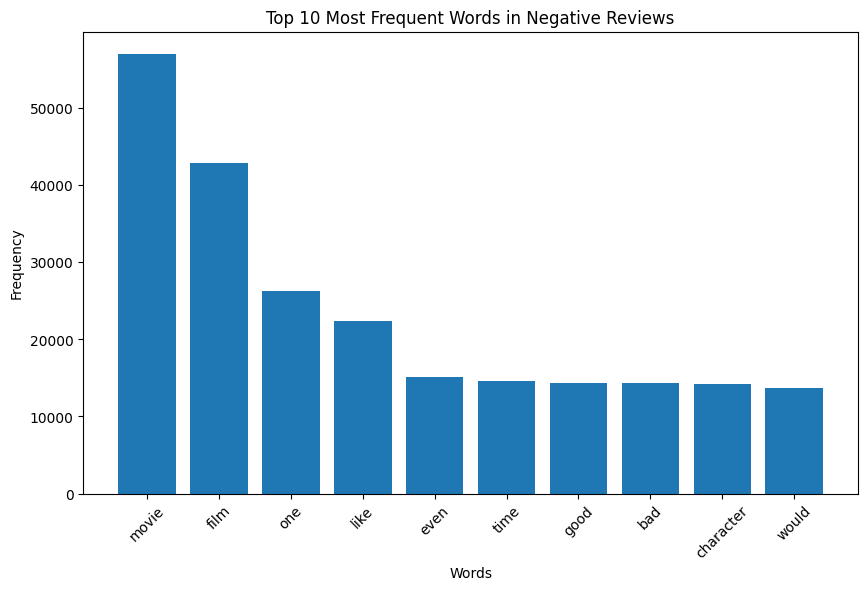

In [33]:
plot_most_frequent_words(negative_reviews['processed_text'], "Top 10 Most Frequent Words in Negative Reviews")
# Call the plot_most_frequent_words function with the processed_text from negative_reviews and a title for negative reviews

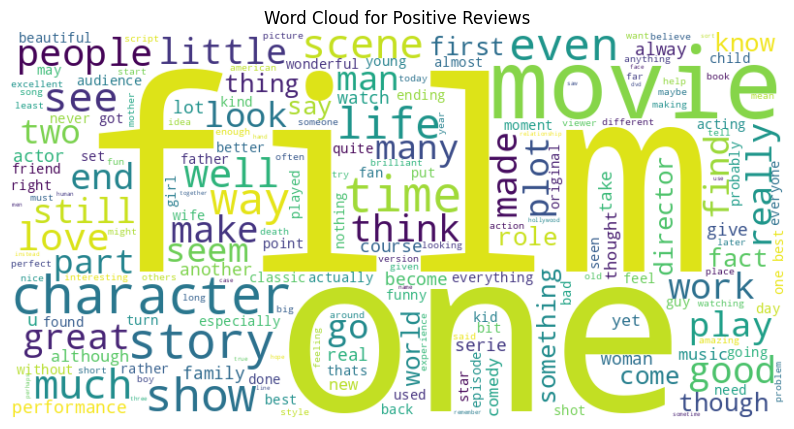

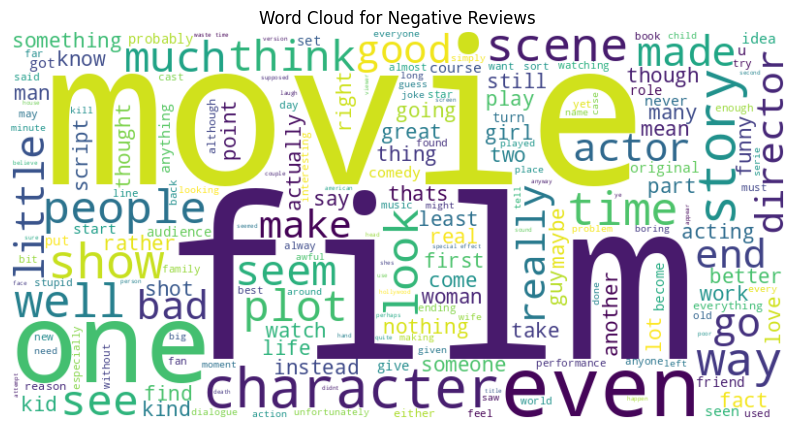

In [34]:
# Word Clouds
# Comment: Indicates that the following code is related to generating word clouds

def generate_word_cloud(text, title):
    # Define a function called generate_word_cloud that takes text and title as input

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Create a word cloud object using the WordCloud class with specified width, height, and background color
    # Generate the word cloud for the given text

    plt.figure(figsize=(10, 6))
    # Create a new figure for the plot with a specified size

    plt.imshow(wordcloud, interpolation='bilinear')
    # Display the word cloud image using imshow() method from Matplotlib

    plt.title(title)
    # Set the title of the plot

    plt.axis('off')
    # Turn off the axis lines and labels

    plt.show()
    # Display the plot

positive_text = ' '.join(positive_reviews['processed_text'])
# Concatenate the processed_text from positive_reviews using ' '.join() to create a single string

negative_text = ' '.join(negative_reviews['processed_text'])
# Concatenate the processed_text from negative_reviews using ' '.join() to create a single string

generate_word_cloud(positive_text, "Word Cloud for Positive Reviews")
# Call the generate_word_cloud function with the positive_text and a title for positive reviews

generate_word_cloud(negative_text, "Word Cloud for Negative Reviews")
# Call the generate_word_cloud function with the negative_text and a title for negative reviews


**Why would you have selected this problem for the challenge?**
- Sentiment analysis is a common and important task in natural language processing (NLP). Understanding the sentiment of movie reviews can provide valuable insights for various applications, such as analyzing customer feedback, recommendation systems, and market research. By selecting this problem for the challenge, the participants can demonstrate their ability to develop effective sentiment analysis models using NLP techniques.

**Some gotchas in this domain you should know about:**
- Subjectivity and context: Sentiment analysis is a challenging task due to the subjective nature of language and the dependence on context. The sentiment of a movie review can vary depending on factors such as sarcasm, irony, or cultural references. Capturing and interpreting these nuances accurately can be difficult.
- Negation handling: Negations can significantly affect the sentiment of a sentence. For example, "I don't like the movie" conveys a negative sentiment, whereas "I don't dislike the movie" conveys a positive sentiment. Handling negations correctly is crucial for accurate sentiment analysis.
- Ambiguity: Sentiment can sometimes be ambiguous, especially in cases where the sentiment expressed in the text is mixed or neutral. Interpreting and correctly labeling such instances can be challenging.

**The highest level of accuracy achieved with this dataset or similar problems/datasets:**
- The provided code does not mention the highest level of accuracy achieved with this dataset or similar problems. 
- To determine the highest accuracy achieved, you would need to refer to the literature or prior research on sentiment analysis using the IMDb dataset or similar datasets. 
- Researchers and practitioners often report their model's accuracy, and you can find benchmark results for sentiment analysis on this dataset.

**Types of visualizations that will help grasp the nature of the problem/data:**
- Distribution of sentiments: Visualizing the distribution of positive and negative sentiments in the dataset can provide an overview of the class balance and help understand the dataset's sentiment distribution.
- Review length distribution: Plotting histograms or boxplots of review lengths for positive and negative reviews can reveal insights about the distribution of text lengths and potential differences between sentiments.
- Word cloud: Creating word clouds based on the most frequent words in positive and negative reviews can give a visual representation of the words associated with each sentiment. This can help identify important keywords and general sentiment trends.

**Feature Engineering:**
- One possible feature engineering technique that could help improve the signal in this project is to create additional text-based features. For example, you could extract numerical features such as the length of the reviews, the number of words, the presence of specific keywords or phrases, or the frequency of certain words or n-grams. These additional features could provide the model with more information about the text and potentially capture more nuanced relationships.

**Modeling Techniques:**
- Logistic Regression, as used in the given code, is a good modeling technique for capturing linear relationships between the features and the target variable. However, in NLP tasks like sentiment analysis, more advanced techniques such as Naive Bayes, Support Vector Machines (SVM), Random Forests, Gradient Boosting, or even deep learning models like Recurrent Neural Networks (RNNs) or Transformer-based models (e.g., BERT) can be effective at capturing complex relationships and improving performance.

**Bug Checking:**
- To ensure that the code does not contain any bugs, you can follow these steps:
  1. Validate the code syntax and ensure that there are no syntax errors or typos.
  2. Verify that the data is loaded correctly and the columns are assigned the correct data types.
  3. Check the preprocessing steps (Step 4) to ensure that the text data is correctly cleaned, transformed to lowercase, and stopwords are removed.
  4. Review the splitting of the dataset (Step 5) to confirm that the data is divided into training and testing sets correctly.
  5. Double-check the feature extraction step (Step 6) to ensure that the TF-IDF vectors are generated accurately.
  6. Examine the model training step (Step 7) to confirm that the logistic regression model is trained correctly on the training data.
  7. Validate the evaluation metrics (accuracy, confusion matrix, classification report) in Step 8 to ensure they are calculated accurately.
  8. Finally, compare the obtained results with your expectations and domain knowledge to identify any potential issues or inconsistencies.

**Model Weaknesses and Improvements:**
- One weakness of the model could be its reliance on a linear classifier like logistic regression, which may not capture more complex relationships in the data. To improve the model, you could try using more advanced algorithms such as ensemble methods (Random Forests, Gradient Boosting), or deep learning models (RNNs, Transformer-based models) that have shown better performance in NLP tasks.
- Another potential weakness is the feature representation. While TF-IDF is a popular choice, it may not capture the semantic meaning of the words effectively. Using more advanced word embeddings techniques like Word2Vec, GloVe, or BERT embeddings can provide better contextual understanding of the text and improve the model's performance.
- Additionally, it may be beneficial to explore hyperparameter tuning to find the optimal settings for the model. This can involve techniques such as grid search or random search to search over a range of hyperparameter values and find the best combination.
- Collecting and incorporating more labeled data into the training set could also help improve the model's performance, as larger and more diverse datasets often lead to better generalization.
- Finally, conducting a thorough error analysis by examining misclassified instances or false positives/negatives can provide insights into the model's weaknesses and guide further improvements.